<a href="https://colab.research.google.com/github/Nunez350/DataScienceAndAnalytics/blob/main/Clustering/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Try-it activity will walk through a clustering model for sample customer data. We will be splitting the customers into groups in order to get greater insight of our customer demographics and spending trends.  

Start by downloading [this](https://mo-pcco.s3.us-east-1.amazonaws.com/MO-PCDS/module4/activity-name-1_starter.zip) data. Once the dataset is downloaded for you locally, execute the code set below and upload the csv file to the Colab Notebook.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.express as pxp
import plotly.graph_objs as gph
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from google.colab import files


uploaded = files.upload()
data = pd.read_csv('4-1Data.csv')
data.head()

Saving 4-1Data.csv to 4-1Data (1).csv


,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Drop the unused column.

In [21]:
data.drop('CustomerID', axis=1, inplace=True)

In [22]:
data.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


We can check the distribution of columns in data to see how data is distributed in various columns.

<ipython-input-23-c7b96264fa97>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-23-c7b96264fa97>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-23-c7b96264fa97>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

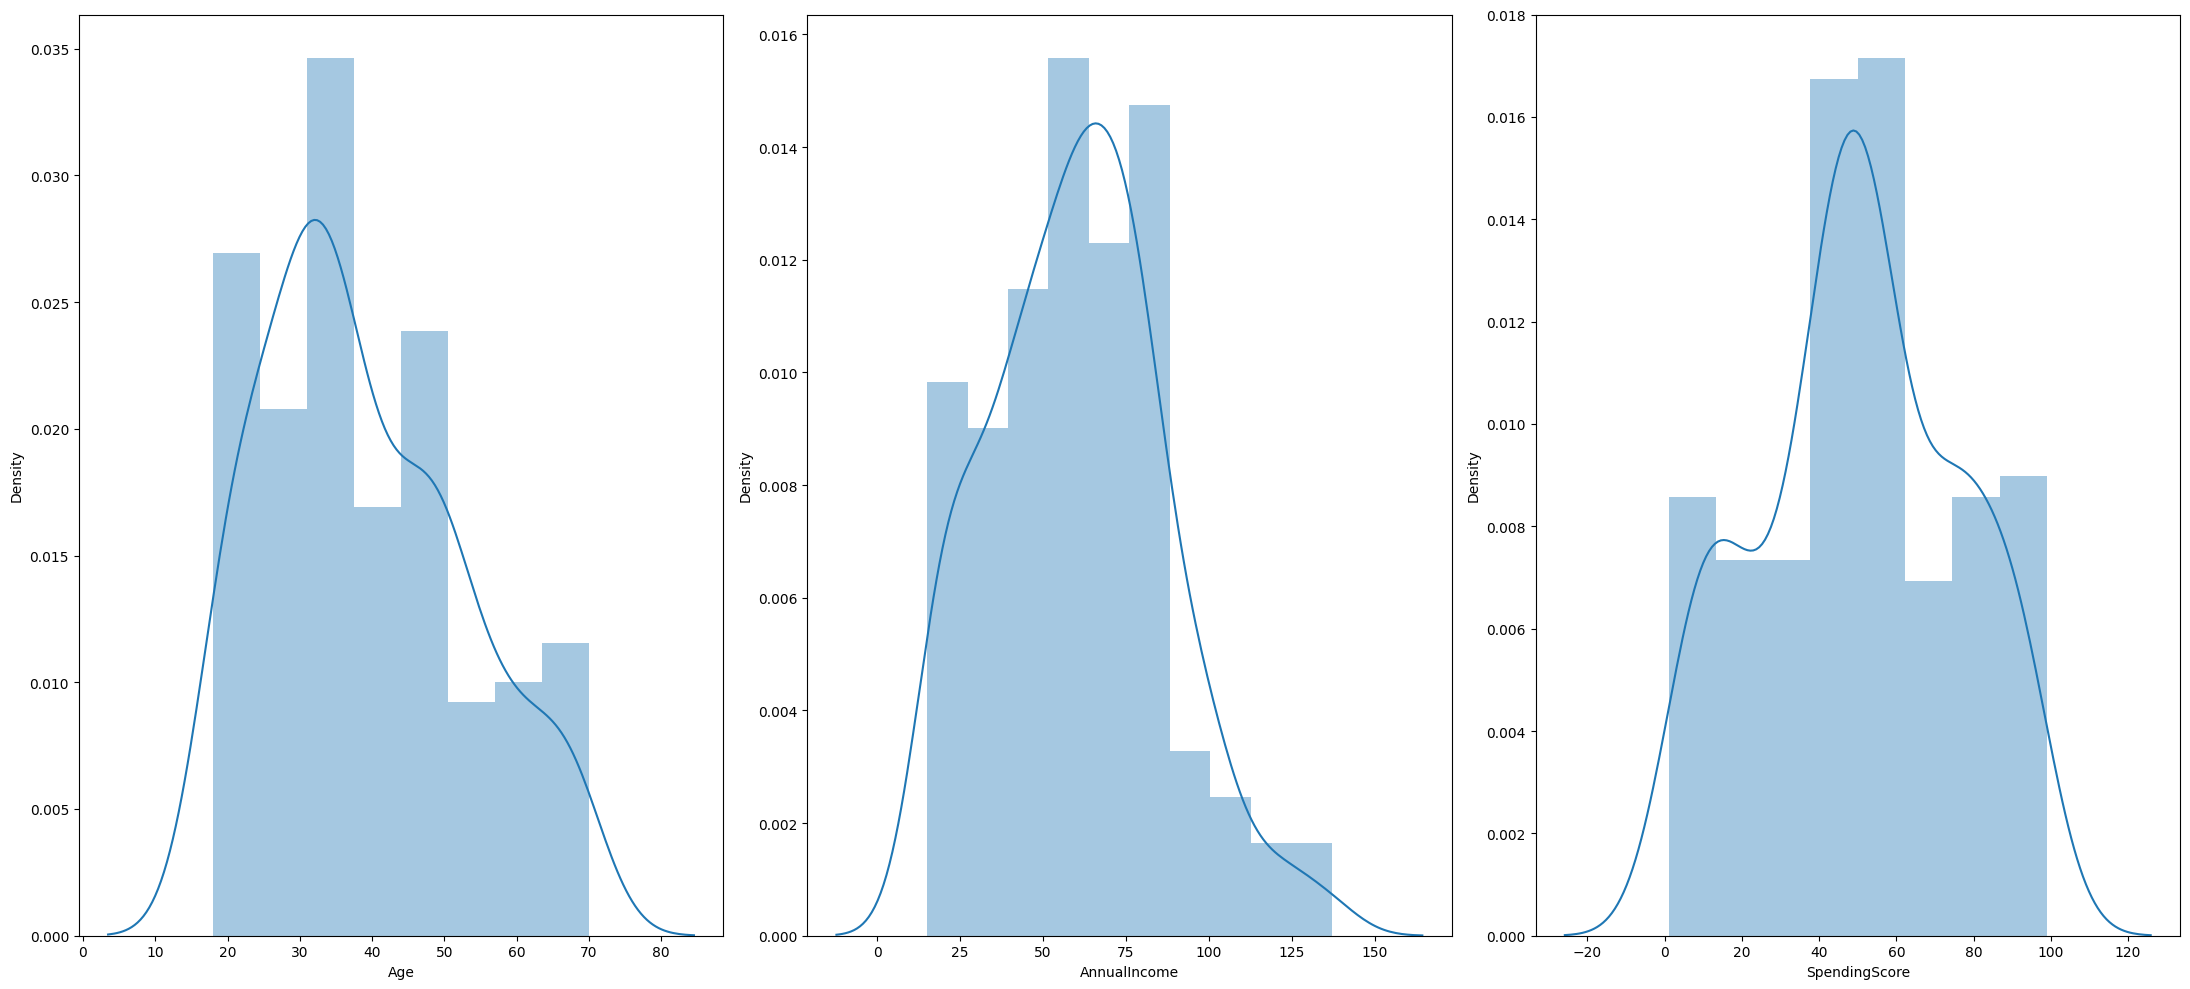

In [23]:
plot.figure(figsize = (22, 10))
plotnum = 1

for cols in ['Age', 'AnnualIncome', 'SpendingScore']:
    if plotnum <= 3:
        axs = plot.subplot(1, 3, plotnum)
        sns.distplot(data[cols])

    plotnum += 1

plot.tight_layout()
plot.show()

Now let’s create a bar plot to check the distribution of customers in particular age groups. You can also apply the same to visualize the number of customers versus spending scores and the number of customers based on their annual income.

In [24]:
AnnualIncome_55above = data.AnnualIncome[data.AnnualIncome >= 55]
aAnnualIncome_46_55 = data.AnnualIncome[(data.AnnualIncome >= 46) & (data.AnnualIncome <= 55)]
AnnualIncome_36_45 = data.AnnualIncome[(data.AnnualIncome >= 36) & (data.AnnualIncome <= 45)]
AnnualIncome_26_35 = data.AnnualIncome[(data.AnnualIncome >= 26) & (data.AnnualIncome <= 35)]
AnnualIncome_18_25 = data.AnnualIncome[(data.AnnualIncome >= 18) & (data.AnnualIncome <= 25)]

In [25]:
x_age_ax = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age_ax = [len(AnnualIncome_18_25.values), len(AnnualIncome_26_35.values), len(AnnualIncome_36_45.values), len(aAnnualIncome_46_55.values),
     len(AnnualIncome_55above.values)]

pxp.bar(data_frame = data, x = x_age_ax, y = y_age_ax, color = x_age_ax,
       title = 'Count of customers per age group')

In [26]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 25, 35, 45, 55, float('inf')],
                          labels=['18-25', '26-35', '36-45', '46-55', '55+'])

# Now group data by these age segments and analyze AnnualIncome within each group
grouped = data.groupby('AgeGroup')['AnnualIncome']

# You can then output the average, median, or other statistical summaries of AnnualIncome
annual_income_summary = grouped.describe()


One of the most critical aspects of clustering is selecting the correct value of K. Randomly selecting K might not be a favorable choice. We’ll be using the elbow method and silhouette score to choose the value of K.

In our case, from the below graph, it looks like the optimal value of K found from the elbow method is 4. We want to maximize the number of clusters and limit cases where each data point becomes its cluster centroid.

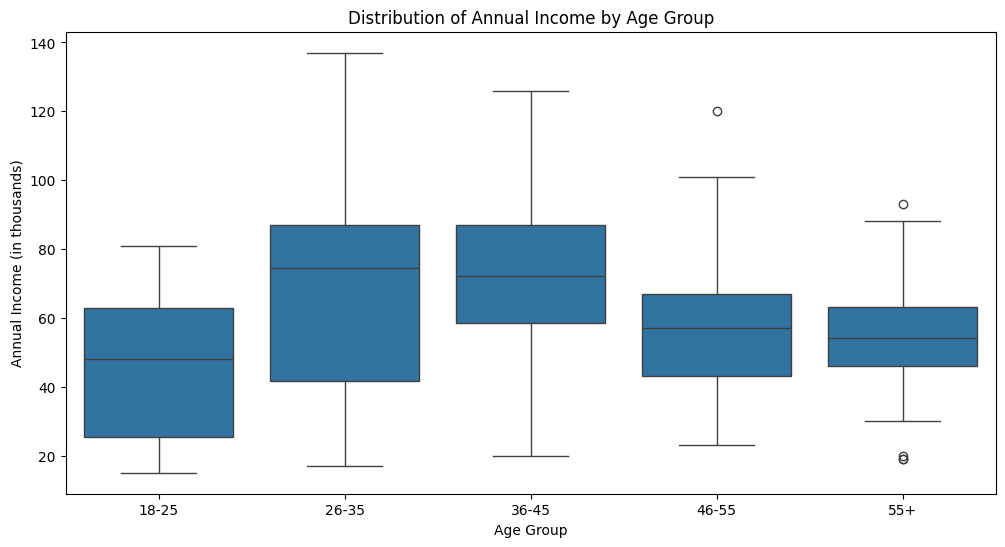

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of AnnualIncome across Age Groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='AgeGroup', y='AnnualIncome', data=data)
plt.title('Distribution of Annual Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Annual Income (in thousands)')
plt.show()


In [28]:
age_55above = data.Age[data.Age >= 55]
age_46_55 = data.Age[(data.Age >= 46) & (data.Age <= 55)]
age_36_45 = data.Age[(data.Age >= 36) & (data.Age <= 45)]
age_26_35 = data.Age[(data.Age >= 26) & (data.Age <= 35)]
age_18_25 = data.Age[(data.Age >= 18) & (data.Age <= 25)]
x_age_ax = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age_ax = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

pxp.bar(data_frame = data, x = x_age_ax, y = y_age_ax, color = x_age_ax,
       title = 'Count of customers per age group')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

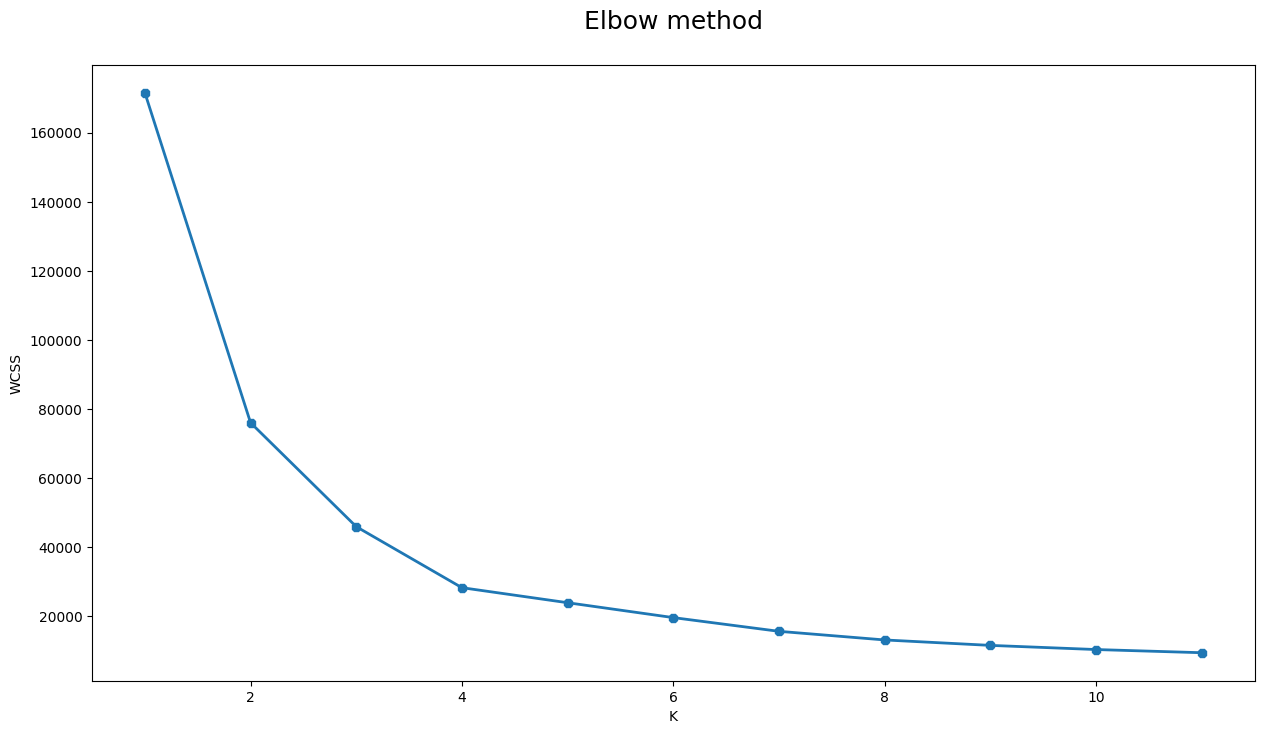

In [29]:
x_input = data.loc[:, ['Age', 'SpendingScore']].values


wcss = []
for k in range(1, 12):
    k_means = KMeans(n_clusters=k, init='k-means++')
    k_means.fit(x_input)
    wcss.append(k_means.inertia_)

plot.figure(figsize=(15,8))

plot.plot(range(1, 12), wcss, linewidth=2, marker='8')
plot.title('Elbow method\n', fontsize=18)
plot.xlabel('K')
plot.ylabel('WCSS')
plot.show()

In [30]:
k_means=KMeans(n_clusters=4)
labels=k_means.fit_predict(x_input)
print(k_means.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Now let’s plot a graph to check how the clusters are formed from the data.

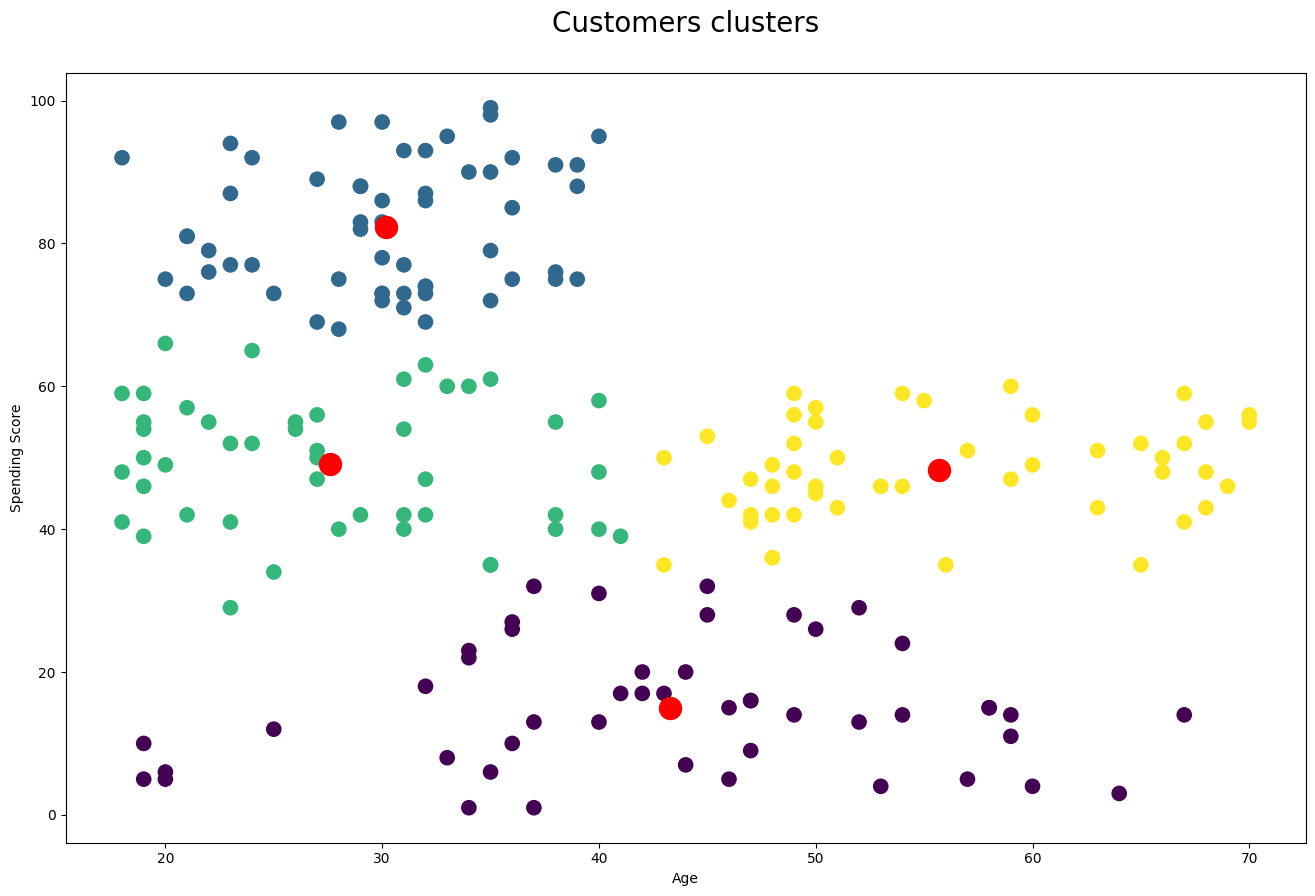

In [31]:
plot.figure(figsize = (16, 10))
plot.scatter(x_input[:, 0], x_input[:, 1], c =
k_means.labels_, s = 105)
plot.scatter(k_means.cluster_centers_[:, 0],k_means.cluster_centers_[:, 1], color = 'red', s = 250)
plot.title('Customers clusters\n', fontsize = 20)
plot.xlabel('Age')
plot.ylabel('Spending Score')
plot.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

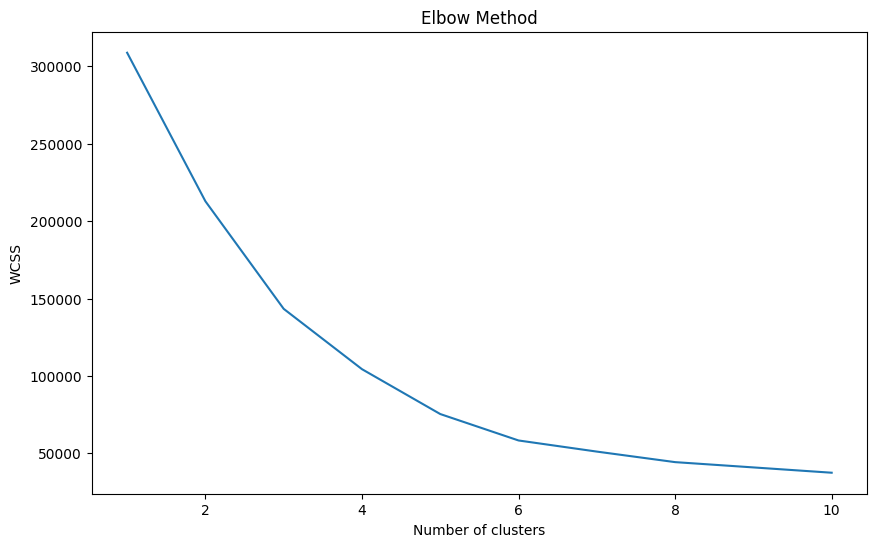

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract the relevant data
X = data[['Age', 'AnnualIncome', 'SpendingScore']]

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):  # Usually, 1 to 10 clusters are sufficient for initial analysis
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [33]:
# Choose the number of clusters based on the elbow graph
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add the cluster labels to the dataframe
data['Cluster'] = cluster_labels

# Check the first few entries to see the clusters
data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Gender,Age,AnnualIncome,SpendingScore,AgeGroup,Cluster
0,Male,19,15,39,18-25,2
1,Male,21,15,81,18-25,2
2,Female,20,16,6,18-25,1
3,Female,23,16,77,18-25,2
4,Female,31,17,40,26-35,1


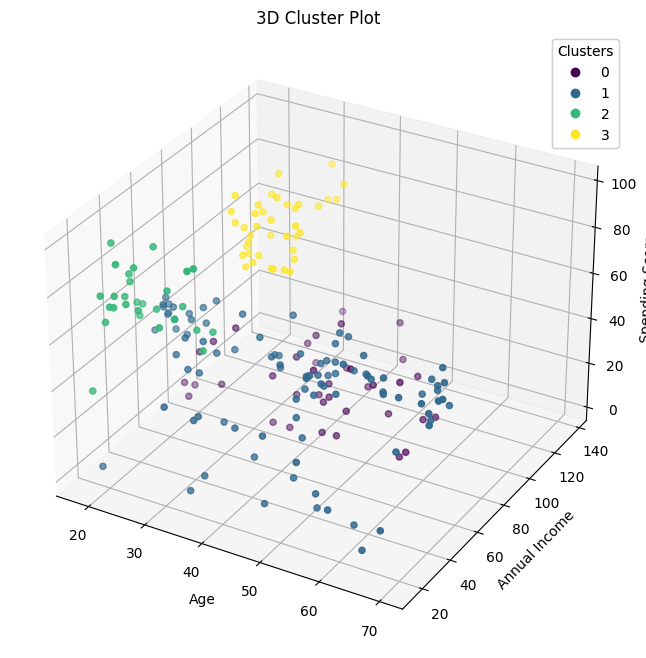

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['AnnualIncome'], data['SpendingScore'], c=data['Cluster'], cmap='viridis')

# Add labels and title
ax.set_title('3D Cluster Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


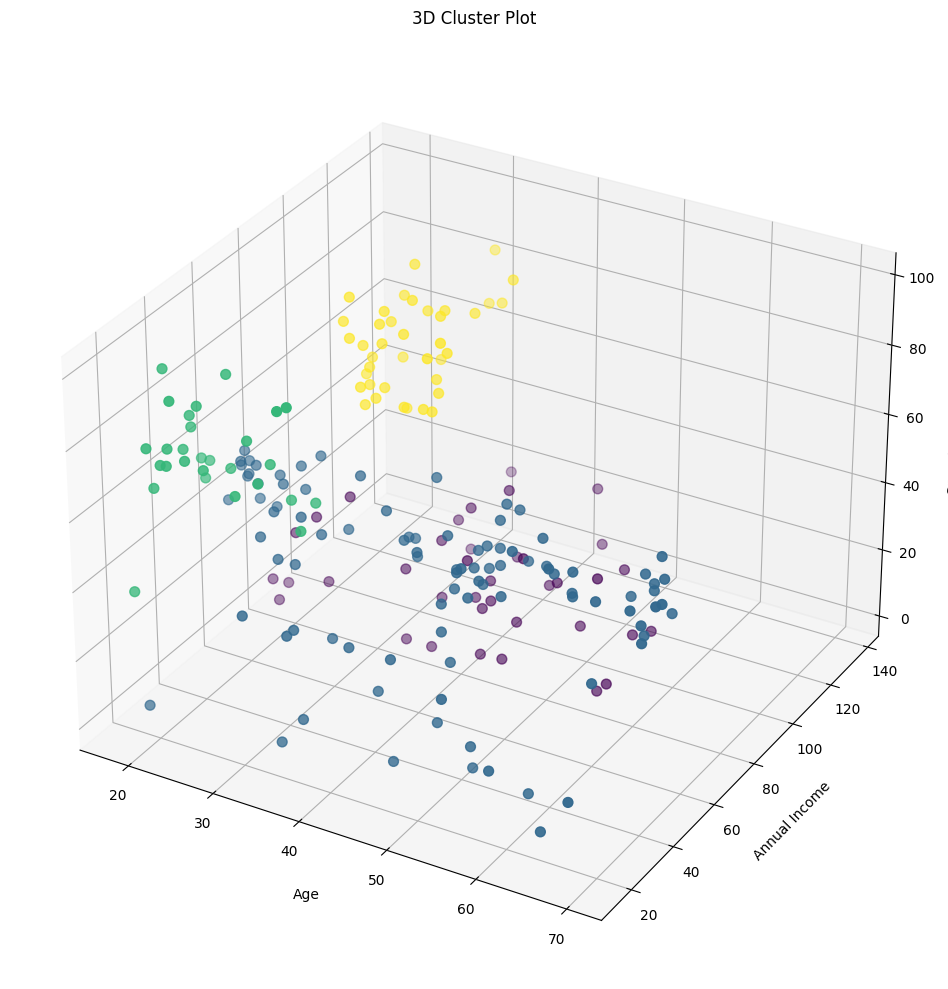

In [35]:
# Create 3D scatter plot
fig = plt.figure(figsize=(14, 10))  # Adjusting figure size for better visibility
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(data['Age'], data['AnnualIncome'], data['SpendingScore'], c=data['Cluster'], cmap='viridis', s=50)

# Adding labels and title with adjusted positions for better clarity
ax.set_title('3D Cluster Plot', pad=20)
ax.set_xlabel('Age', labelpad=10)
ax.set_ylabel('Annual Income', labelpad=10)
ax.set_zlabel('Spending Score', labelpad=10)

# Legend
# Create a legend for the colors, this might involve creating a custom legend if needed
legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper left', bbox_to_anchor=(1.05, 1))
ax.add_artist(legend)

# Improving the spacing and layout
plt.tight_layout()

# Show plot
plt.show()

In [36]:
from sklearn.metrics import silhouette_score

# Assuming 'X' is the data used for clustering and 'cluster_labels' are the labels from the KMeans algorithm
silhouette_avg = silhouette_score(X, cluster_labels)
print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.40546302077733304


In [37]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz_score_value = calinski_harabasz_score(X, cluster_labels)
print("The Calinski-Harabasz score is:", calinski_harabasz_score_value)


The Calinski-Harabasz score is: 127.9838294818919


In [38]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score_value = davies_bouldin_score(X, cluster_labels)
print("The Davies-Bouldin score is:", davies_bouldin_score_value)



The Davies-Bouldin score is: 0.8914904209843166


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

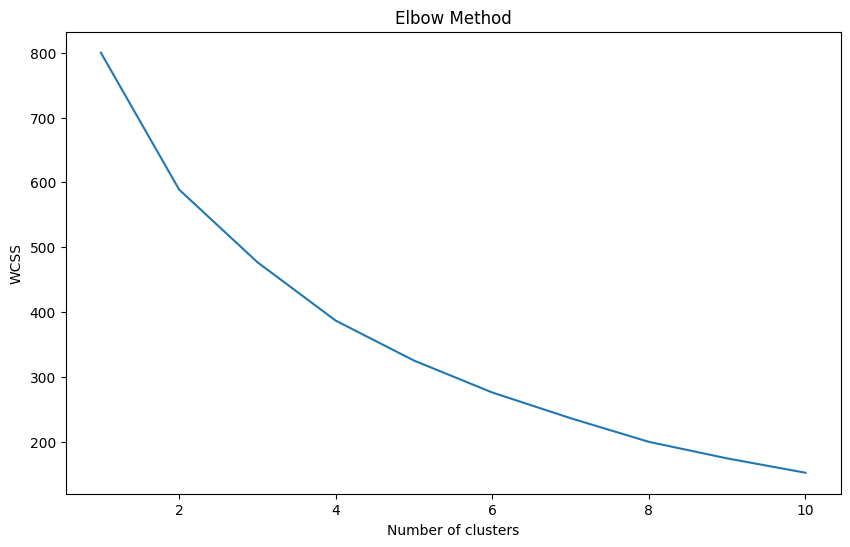

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



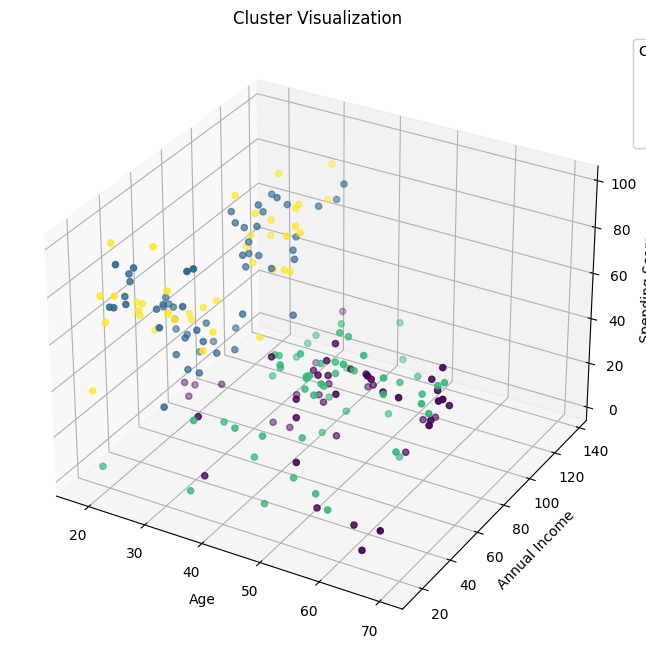

In [42]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and prepare your data
# data = pd.read_csv('your_data.csv')  # Update the file name as necessary

# Assuming 'Gender' is categorical and needs encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Features for clustering
features = ['Age', 'AnnualIncome', 'SpendingScore', 'Gender']
X = data[features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-means and using the Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Assuming the optimal cluster number is 4 based on the elbow graph
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
data['Cluster'] = cluster_labels

# Visualize the clusters (using first three features for simplicity)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['AnnualIncome'], data['SpendingScore'], c=data['Cluster'], cmap='viridis')

ax.set_title('Cluster Visualization')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

# Create a legend for the colors
legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper left', bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.show()


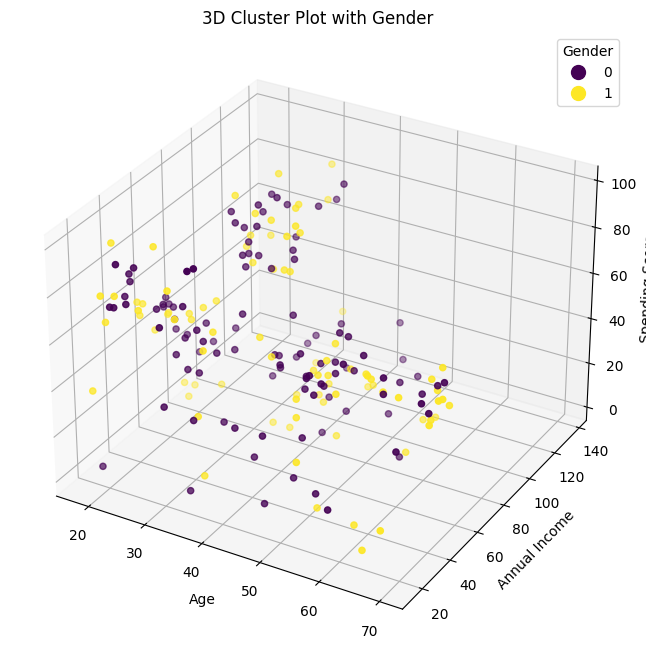

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Assuming 'Gender' is a categorical variable that needs encoding
encoder = LabelEncoder()
data['Gender_encoded'] = encoder.fit_transform(data['Gender'])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['AnnualIncome'], data['SpendingScore'], c=data['Gender_encoded'], cmap='viridis', label=encoder.classes_)

ax.set_title('3D Cluster Plot with Gender')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

# Create a custom legend for gender
colors = [scatter.cmap(scatter.norm(i)) for i in range(len(encoder.classes_))]
labels = encoder.classes_
custom_legend = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=10) for color, label in zip(colors, labels)]
ax.legend(custom_legend, labels, title="Gender")

plt.show()


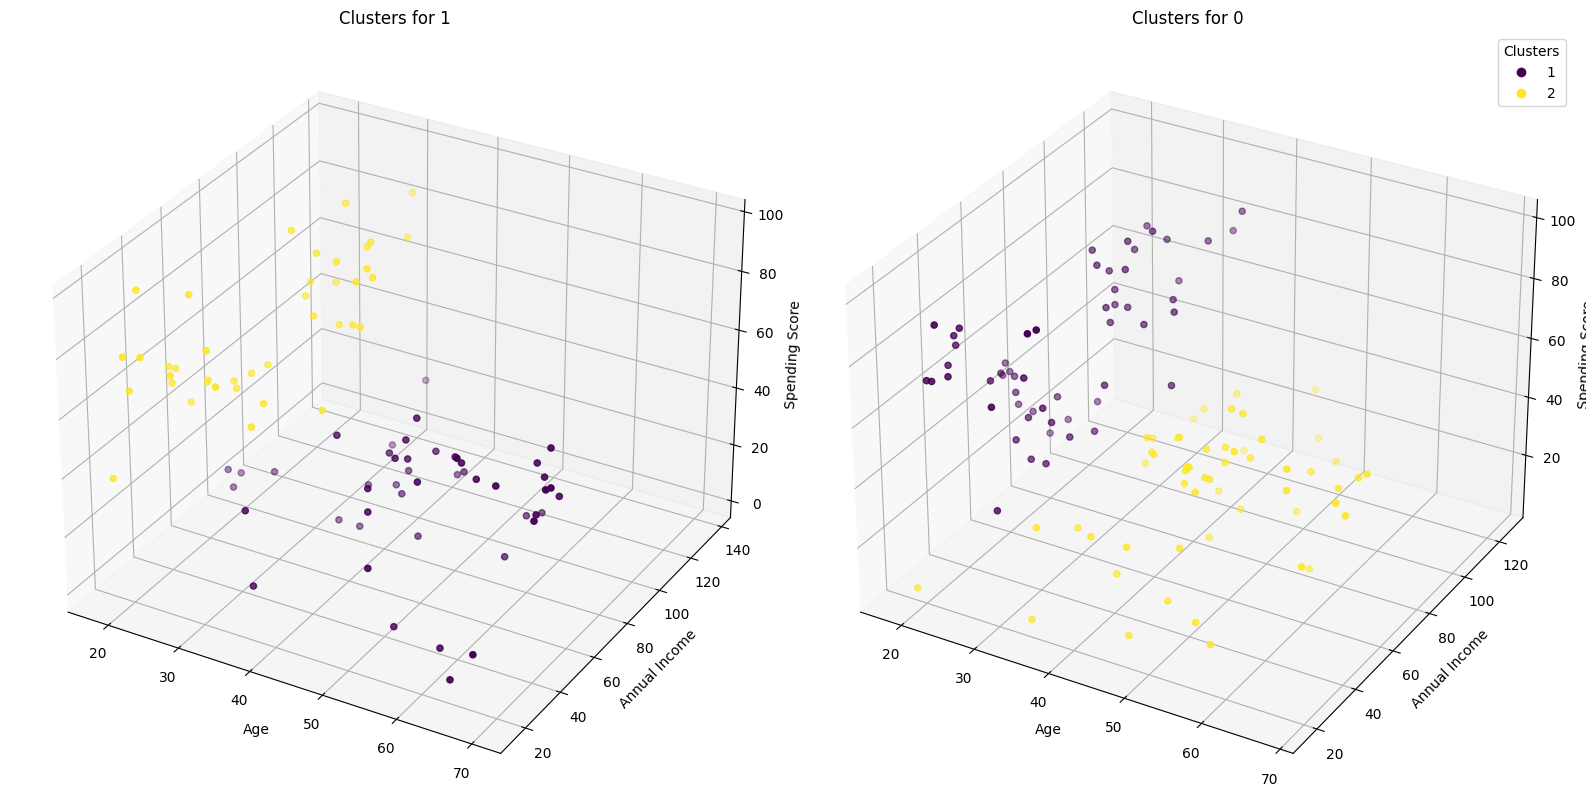

In [45]:
genders = data['Gender'].unique()
fig = plt.figure(figsize=(16, 8))

for i, gender in enumerate(genders, 1):
    ax = fig.add_subplot(1, len(genders), i, projection='3d')
    subset = data[data['Gender'] == gender]

    scatter = ax.scatter(subset['Age'], subset['AnnualIncome'], subset['SpendingScore'], c=subset['Cluster'], cmap='viridis')

    ax.set_title(f'Clusters for {gender}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income')
    ax.set_zlabel('Spending Score')

# Create a single legend for the clusters if needed
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.tight_layout()
plt.show()



In [46]:
import pandas as pd

# Assume 'data' is your DataFrame containing 'AnnualIncome' and 'SpendingScore'
data['SpendingEfficiency'] = data['SpendingScore'] / data['AnnualIncome']
data['SpendingEfficiency'] = data['SpendingEfficiency'].replace([np.inf, -np.inf], np.nan)  # Handling possible infinite values
data.dropna(subset=['SpendingEfficiency'], inplace=True)  # Dropping any NaN values which might occur if AnnualIncome is 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

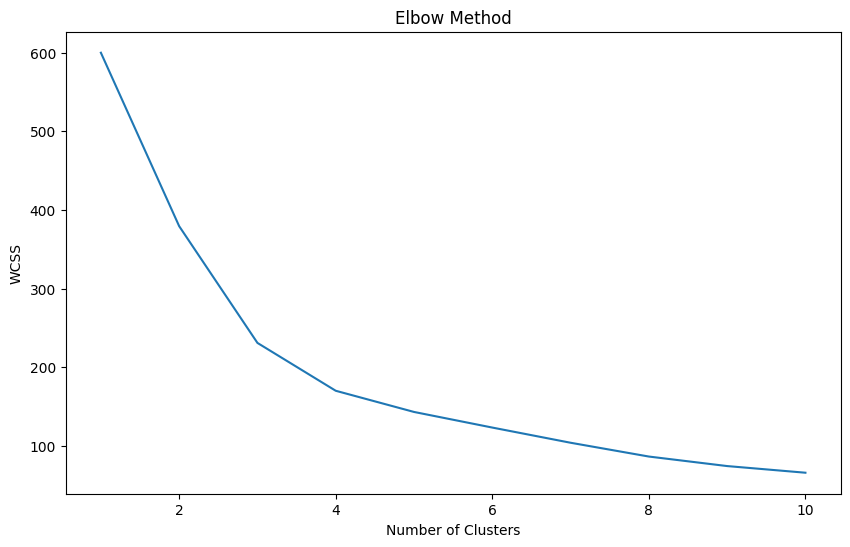

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = ['Age', 'AnnualIncome', 'SpendingEfficiency']
X = data[features]

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-means
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculating WCSS to determine the number of clusters if not known
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS to find the elbow
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


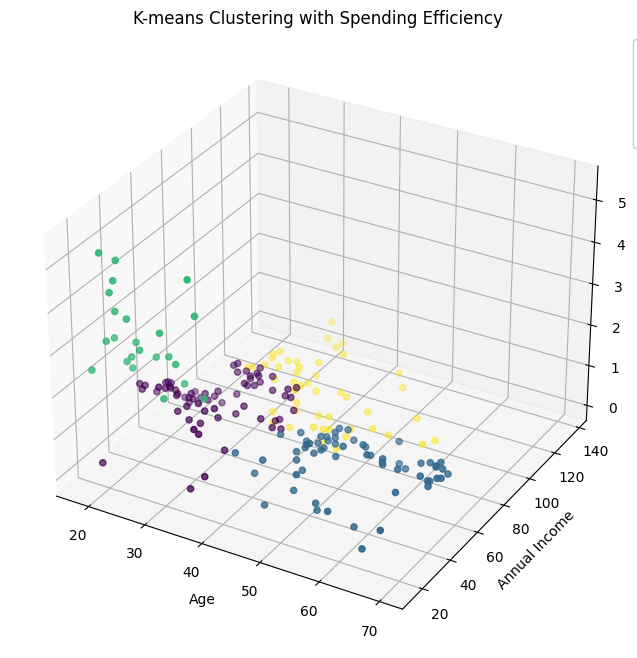

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting clusters
scatter = ax.scatter(data['Age'], data['AnnualIncome'], data['SpendingEfficiency'], c=data['Cluster'], cmap='viridis')

# Adding labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Efficiency')

# Adding title and legend
ax.set_title('K-means Clustering with Spending Efficiency')
legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper left', bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.show()


In [49]:
from sklearn.metrics import silhouette_score

# Calculate the average silhouette score
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print("The average silhouette score is :", silhouette_avg)


The average silhouette score is : 0.37161754750431697


In [50]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming X_scaled and data['Cluster'] are defined as shown in previous examples
# Calculate the average silhouette score
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])

# Calculate the Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, data['Cluster'])

# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, data['Cluster'])

silhouette_avg, calinski_harabasz, davies_bouldin


(0.37161754750431697, 164.99432825953983, 0.8974166645446648)